# Scripting the new translation and rotation

We have finished working through the math of the temporal instanton problem. Here we develop a script to perform the various solution steps.

## Data import

First thing's first. Load the data:

In [41]:
####### IMPORTS: DATA ACQUISITION ########
include("../src/tmp_inst_rts96.jl")

psData = psDataLoad()

# unpack psDL (boilerplate):
(Sb,f,t,r,x,b,Y,bustype,
Gp,Gq,Dp,Dq,Rp,Rq,
Pmax,Pmin,Qmax,Qmin,Plim,
Vg,Vceiling,Vfloor,
busIdx,N,Nr,Ng,k) = unpack_psDL(psData)

####### IMPORTS: INSTANTON CODE ########
# Get instanton code into workspace:
include("../src/TemporalInstanton.jl")
include("../src/TrustRegionSubproblem.jl")

using TemporalInstanton

####### DATA LINKING ########
# Static
Ridx = find(Rp) # Vector of renewable nodes
Y = full(Y) # Full admittance matrix (ref not removed)
ref = 1 # Index of ref node
k = k # Conventional generator participation factors
tau = 1. # Heating constant
G0 = [Gp,Gp,Gp]
D0 = [Dp,Dp,Dp]
P0 = [0.5.*Rp,Rp,1.5.*Rp]
kQobj = 0 # Should always be zero; objective has no constant term
c = 0.1 # RHS of line temperature constraint
kQtheta = -c # Move to LHS so we have Q(z) = 0

T = int(length(G0)/size(Y,1))

# Changing:
lines = [(f[i],t[i]) for i in 1:length(f)];

# For a single line:
line = lines[91]

# Create instance of instanton problem
Qobj,A,b,Qtheta = temporalInstanton(Ridx,Y,ref,k,tau,line,G0,P0,D0)

(
279x279 Array{Float64,2}:
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  

In [42]:
# Build obj and constraint quadratics:
G_of_x = (Qobj,0,kQobj)
Q_of_x = (Qtheta,0,kQtheta)

(
279x279 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  

## Translation

The following two methods partition the $A$ matrix, find the appropriate translation point $x^*$, and translate a general quadratic:

In [25]:
function partition_A(A,Qobj,T)
    """ Return A1, A2, A3 where
    A1 corresponds to wind
    A2 corresponds to angles + mismatch
    A3 corresponds to angle difference vars
    """
    m,n = size(A)
    idx1 = find(diag(Qobj))
    idx2 = setdiff(1:n-T,idx1)
    idx3 = n-T+1:n
    idx = [idx1,idx2,idx3]
    
    A1 = A[:,idx1]
    A2 = A[:,idx2]
    A3 = A[:,idx3]
    return A1,A2,A3,idx1,idx2,idx3
end

function find_x_star(Qobj,A,b,T)
    A1,A2,A3,idx1,idx2,idx3 = partition_A(A,Qobj,T)
    x_star = zeros(size(A,2))
    x_star[[idx1,idx2]] = [A1 A2]\b
    return x_star
end

function translate_quadratic(G_of_x,x_star)
    """ This function performs the change of variables from x to z,
    where z = x - x_star. (For translating a quadratic problem.)
    Returns triple H_of_x consisting of matrix H, vector h, constant kh.

    Arguments
    G_of_x consists of matrix G, vector g, constant kg.
    x_star is translation.

    Assume x_star is min-norm solution of Ax=b.
    """
    G,g,kg = G_of_x
    if g == 0
        g = zeros(size(G,1),1)
    end
    H = G
    h = g + 2*G*x_star
    kh = kg + x_star'*G*x_star + g'*x_star
    return (H,h,kh[1])
end

translate_quadratic (generic function with 1 method)

Use the above methods to translate the problem:

In [43]:
# Partition A:
A1,A2,A3,idx1,idx2,idx3 = partition_A(A,Qobj,T)

# Find translation point:
x_star = find_x_star(Qobj,A,b,T)

# Translate quadratics:
G_of_y = translate_quadratic(G_of_x,x_star)
Q_of_y = translate_quadratic(Q_of_x,x_star)

(
279x279 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  

Quick inspection shows that $G(y)$ has a linear term, but $Q(y)$ does not, as expected.

## Kernel mapping

Here we "rotate" by $N^\top$, where $N$ consists of $k$ columns spanning $\mathcal{N}(A)$.

The following method rotates a quadratic:

In [1]:
function rotate_quadratic(G_of_x,R)
    """ Rotate quadratic G_of_x by
    rotation matrix R.
    """
    G,g,kg = G_of_x
    return (R*G*R',R*g,kg)
end

rotate_quadratic (generic function with 1 method)

This method finds $N$:

In [28]:
function kernel_rotation(A)
    """ Find an orthonormal basis for the 
    nullspace of A. This matrix may be used
    to rotate a temporal instanton problem
    instance.
    """
    m,n = size(A)
    dim_N = n - rank(A)
    # if A has full row rank:
    # dim_N = n - m
    q = qr(A'; thin=false)[1]
    R = circshift(q,(0,dim_N))
    return R
end

kernel_rotation (generic function with 1 method)

Here we find and partition $N$, then rotate our objective and constraint quadratics by it:

In [44]:
N = kernel_rotation(A)[:,1:size(A,2) - rank(A)] # take only first k cols

N1,N2,N3 = N[idx1,:],N[idx2,:],N[idx3,:] # partition N

G_of_z = rotate_quadratic(G_of_y,N')
Q_of_z = rotate_quadratic(Q_of_y,N')

(
54x54 Array{Float64,2}:
  9.4503e-6   -8.05738e-6   3.04128e-6  …   7.58024e-6   7.68066e-6
 -8.05738e-6   7.27236e-6  -1.17451e-6     -6.49857e-6  -2.62787e-6
  3.04128e-6  -1.17451e-6   6.0058e-6       2.32144e-6   1.6478e-5 
  6.1788e-6   -3.90417e-6   6.82496e-6      4.84339e-6   1.85082e-5
 -5.127e-6     3.30969e-6  -5.43717e-6     -4.03052e-6  -1.48136e-5
 -7.16462e-7   7.22838e-7   1.53114e-7  …  -5.87381e-7   4.36568e-7
 -3.27492e-6   3.35291e-6   9.25115e-7     -2.67558e-6   2.82166e-6
 -7.28815e-6   8.72548e-6   6.57531e-6     -6.04977e-6   1.90076e-5
 -3.08852e-6   2.21551e-6  -2.48873e-6     -2.44624e-6  -6.72902e-6
  5.68137e-6  -7.61042e-6  -8.02096e-6      4.77567e-6  -2.29969e-5
 -9.53142e-7   8.46407e-7  -2.01348e-7  …  -7.70992e-7  -5.35237e-7
  1.75111e-5  -1.94782e-5  -1.05405e-5      1.44095e-5  -3.10559e-5
 -1.31504e-5   1.43719e-5   6.97572e-6     -1.08086e-5   2.05748e-5
  ⋮                                     ⋱                          
 -1.27011e-5   1.13425

Now things are a bit messy. Neither the objective nor the constraint quadratics are diagonal.

## Constraint Eigendecomposition and rotation

Here we change variables from $z$ to $w$ to render the constraint a norm constraint. This is done by letting $w=KU^\top z$ where `D,U = eig(Q_of_z[1])`. Thus, we can use the previously defined rotation method with $R=(UK^{-1})^\top$.

The following method computes $K$:

In [30]:
function return_K(D)
    K = ones(length(D))
    K[find(D)] = sqrt(D[find(D)])
    K = diagm(K)
    return K
end

return_K (generic function with 1 method)

This script finds $U$, stores $K$, and uses them rotate the problem:

In [45]:
D,U = eig(Q_of_z[1])
D = round(D,10)

K = return_K(D)

G_of_w = rotate_quadratic(G_of_z,(U/K)')
Q_of_w = rotate_quadratic(Q_of_z,(U/K)')

(
54x54 Array{Float64,2}:
  1.26138e-20  -1.83897e-21   2.04343e-21  …   1.26922e-19  -6.17293e-18
 -1.29275e-21   9.37966e-22  -1.46006e-21     -1.63592e-19   4.19851e-19
 -1.40066e-21   5.08943e-22  -1.52483e-21      9.92088e-19   1.05405e-18
  1.57985e-21  -1.2485e-21    1.37268e-22      2.93455e-18  -1.86723e-18
 -1.43033e-21  -6.923e-22    -1.21576e-21      1.966e-18     5.26543e-19
  1.63207e-22  -4.10289e-22  -1.83936e-21  …  -3.45792e-18   2.09203e-18
 -4.92787e-22   1.05962e-22  -1.46819e-22     -3.20049e-18   1.41018e-18
  5.20619e-23   3.00072e-22   1.33884e-21     -7.16633e-19  -2.79242e-18
  3.79967e-21  -7.57718e-22  -1.58163e-22      6.97483e-20  -6.69533e-19
 -2.51897e-21  -2.90384e-23  -9.09393e-22      2.36193e-18  -1.32143e-18
 -2.11555e-21   2.11994e-21  -3.42429e-21  …   1.63037e-18  -6.59196e-19
  5.42277e-23   1.69595e-22   2.14434e-21      5.4907e-19    4.19458e-18
 -4.3172e-21   -1.52319e-22   4.03709e-22     -2.15679e-19  -1.32872e-20
  ⋮                      

The objective is still a mess, but now `Q_of_w[1]` is all zeros with $T$ ones at the end of its diagonal, as desired.

## Eliminating $w_1$

We are only interested in $w_2$ -- $w_1$ doesn't enter into the constraint, so we will eliminate it using the KKT conditions.

This means we want to 

* partition $B=$ `G_of_w[1]` into $B_{11}$, $B_{12}$, and $B_{22}$

* partition $b$ into $b_1$ and $b_2$

* solve for $\hat{B}$ and $\hat{b}$.

The following methods find and partition $B$ and $b$, and solve for $\hat{B}$ and $\hat{b}$:

In [32]:
function partition_B(G_of_w,Q_of_w)
    B,b = G_of_w[1],G_of_w[2]
    Q = round(Q_of_w[1])
    i2 = find(diag(Q))
    i1 = setdiff(1:size(Q,1),i2)
    B11,B12,B21,B22 = B[i1,i1],B[i1,i2],B[i2,i1],B[i2,i2]
    b1 = b[i1]
    b2 = b[i2]
    return B11,B12,B21,B22,b1,b2
end

function return_Bhat(B11,B12,B22,b2)
    Bhat = B22 - (B12'/B11)*B12
    bhat = b2 - (B12'/B11)*b1
    return round(Bhat,10),bhat
end

return_Bhat (generic function with 1 method)

This script uses the above methods to return $\hat{B}$ and $\hat{b}$ for the RTS-96:

In [46]:
B11,B12,B21,B22,b1,b2 = partition_B(G_of_w,Q_of_w)

Bhat,bhat = return_Bhat(B11,B12,B22,b2)

(
3x3 Array{Float64,2}:
 1346.62    -0.0      0.0 
   -0.0   1346.62    -0.0 
    0.0     -0.0   1346.62,

[687.449,-267.505,243.392])

Note that $\hat{B}$ is diagonal.

___
Skipping objective diagonalization because $\hat{B}$ is already diagonal...
___

## Solution via first-order optimality conditions

We now have

\begin{align*}
&& \min~ w_2^\top \hat{B}w_2 + w_2^\top \hat{b} \\
s.t. && w_2^\top w_2 &= c
\end{align*}

Where $\hat{B}$ is diagonal. When we write the first-order optimality conditions, we obtain a relationship for $\hat{w}_2$ in terms of $v$:

\begin{align}
\hat{w}_{2,i} &= \frac{1}{2}\left(\frac{\hat{b}_i}{v - \hat{B}_{i,i}}\right)
\end{align}

This method takes $v$ as an argument and returns $\hat{w}_2$ according to the relationship above:

In [34]:
function find_w(v,D,d)
    if v == 0
        w = float([-d[i]/(D[i,i]) for i in 1:length(d)])
    else
        w = float([d[i]/(v - D[i,i]) for i in 1:length(d)])
    end
    return w
end

find_w (generic function with 1 method)

Note that `D` should be $\hat{B}$ and `d` should be $\hat{b}/2$.

Before we can solve the secular equation, we need to rule out the case $v=0$. The following script does this:

In [35]:
eps = 1e-8
w0 = find_w(0,Bhat,bhat/2)

c = - Q_of_w[3]

if abs((w0'*w0) - c)[1] < eps
    println("v=0 works!")
end

Now we can formulate and solve the secular equation. The general form is:

\begin{align}
s(v) &= \sum_i \left(\frac{d_i}{v - D_{i,i}}\right)^2 = c
\end{align}

The following method solves this equation using binary search:

In [36]:
function solve_secular(D,d,c)
    """ Solve the secular equation via binary search.
    """
    eps = 1e-8
    solutions = Float64[]
    vectors = Array(Vector{Float64},0)
    poles = sort(unique(round(diag(D),10)))
    
    # Each diagonal element is a pole.
    for i in 1:length(poles)
        
        # Head left first:
        high = poles[i]
        if length(poles) == 1
            low = high - high
        elseif i == 1
            low = high - abs(poles[i] - poles[i+1])
        else
            low = high - abs(poles[i] - poles[i-1])/2
        end
        
        # Initialize v:
        v = (high + low)/2
        w = find_w(v,D,d)
        diff = (w'*w)[1] - c
        diff_old = 0
        stall = false
        while abs(diff) > eps
            if diff == diff_old
                stall = true
                break
            end
            if diff > 0
                high = v
            else
                low = v
            end
            v = (high + low)/2
            w = find_w(v,D,d)
            diff_old = diff
            diff = (w'*w)[1] - c
        end
        if !stall
            push!(solutions,v)
            push!(vectors,w)
        end
        
        # Now head right:
        high = poles[i]
        if length(poles) == 1
            low = high + high
        elseif i == length(poles)
            low = high + abs(poles[i] - poles[i-1])
        else
            low = high + abs(poles[i] - poles[i+1])/2
        end
        
        v = (high + low)/2
        w = find_w(v,D,d)
        diff = (w'*w)[1] - c
        diff_old = 0
        stall = false
        while abs(diff) > eps
            if diff == diff_old
                stall = true
                break
            end
            if diff > 0
                high = v
            else
                low = v
            end
            v = (high + low)/2
            w = find_w(v,D,d)
            diff_old = diff
            diff = (w'*w)[1] - c
        end
        if !stall
            push!(solutions,v)
            push!(vectors,w)
        end
    end
    return solutions,vectors
end

solve_secular (generic function with 1 method)

This line solves the secular equation for our particular problem:

In [47]:
solutions, vectors = solve_secular(Bhat,bhat/2,-Q_of_w[3])

([118.424,2574.81],[[-0.279862,0.108902,-0.0990853],[0.279862,-0.108902,0.0990853]])

Let's visualize the secular equation:

In [38]:
using Interact
using PyPlot

INFO: Loading help data...


Slider{Float64}([Input{Float64}] 0.25,"c",0.25,0.05:0.05:0.5)

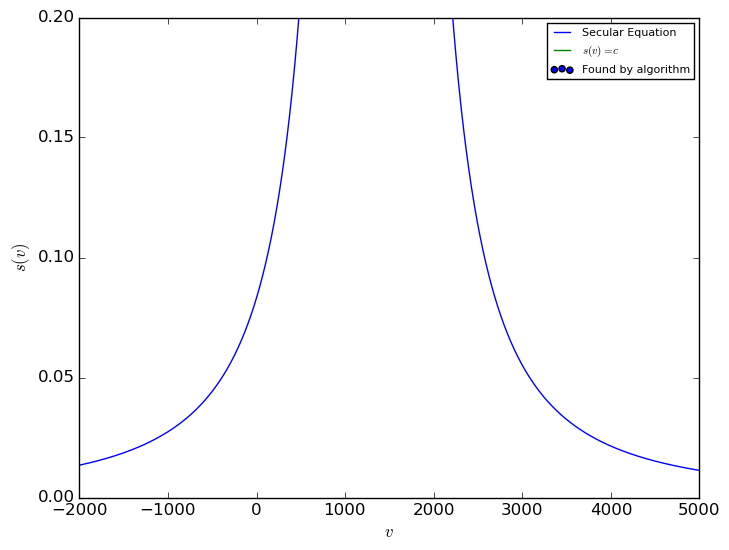

In [66]:
f = figure()
poles = sort(unique(round(diag(Bhat),10)))

@manipulate for c = 0.05:0.05:0.5; withfig(f) do
        solutions,vectors = solve_secular(Bhat,bhat/2,c)

        v_vals = linspace(minimum(poles)-4*minimum(poles),maximum(poles) + 4*maximum(poles),10000)
        s_vals = [(find_w(i,Bhat,bhat/2)'*find_w(i,Bhat,bhat/2))[1] for i in v_vals]
        plot(v_vals,s_vals)
        hold = true
        plot([v_vals[1],v_vals[end]],[c,c])
        ylim([0,0.2])
        scatter(solutions,c*ones(length(solutions)))
        legend(["Secular Equation",L"s(v) = c","Found by algorithm"],fontsize=8)
        xlabel(L"v")
        ylabel(L"s(v)")
        axis([-2000,5000,0,0.2])
    end
end

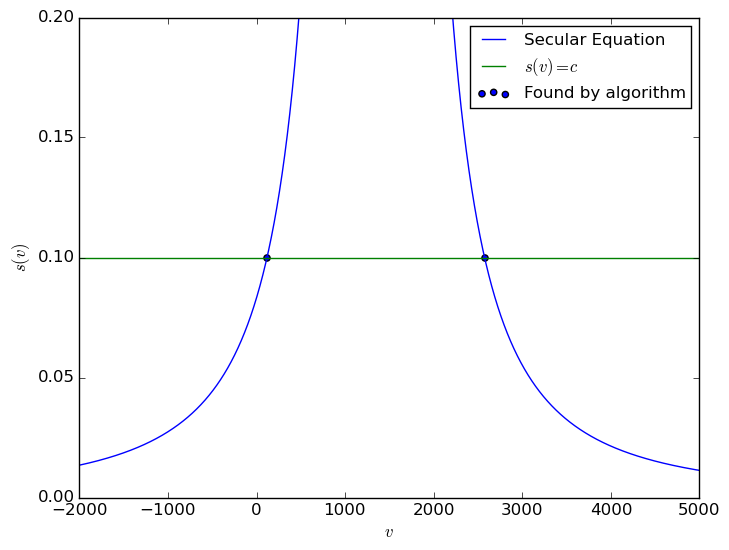

In [70]:
f = figure()
c = 0.1
poles = sort(unique(round(diag(Bhat),10)))

        solutions,vectors = solve_secular(Bhat,bhat/2,c)

        v_vals = linspace(minimum(poles)-4*minimum(poles),maximum(poles) + 4*maximum(poles),10000)
        s_vals = [(find_w(i,Bhat,bhat/2)'*find_w(i,Bhat,bhat/2))[1] for i in v_vals]
        plot(v_vals,s_vals)
        hold = true
        plot([v_vals[1],v_vals[end]],[c,c])
        ylim([0,0.2])
        scatter(solutions,c*ones(length(solutions)))
        legend(["Secular Equation",L"s(v) = c","Found by algorithm"],fontsize=12)
        xlabel(L"v")
        ylabel(L"s(v)")
        axis([-2000,5000,0,0.2])

savefig("../images/secular2.pdf")

## Mapping back

Having found solutions $\hat{w}_2^*$, we need to map back to the original problem space.

In [18]:
function return_xopt(w2opt,B11,B12,b1,N,U,K,x_star)
    w1opt = -B11\(B12*w2opt + b1/2)
    wopt = [w1opt,w2opt]
    xopt = (N*U/K)*wopt + x_star
    return xopt
end

return_xopt (generic function with 1 method)

In [19]:
xopt = return_xopt(vectors[1],B11,B12,b1,N,U,K,x_star)

279-element Array{Float64,1}:
   0.763317  
   3.03236   
   3.39841   
   3.22306   
   3.14139   
   4.038     
   4.59416   
   3.06555   
   4.90005   
 -17.9025    
  -7.37709   
  -5.21467   
   4.49813   
   ⋮         
  -0.0990153 
   0.0721015 
   0.176531  
  -0.0575429 
  -0.00701291
   0.242252  
  -0.0594341 
   0.288992  
 -45.6281    
  -0.606609  
  -0.576838  
  -0.547068  

Sanity checks:

In [20]:
maximum(abs(A*xopt - b))

2.6403323971635473e-12

In [21]:
xopt'*Qtheta*xopt

1-element Array{Float64,1}:
 1.0

Everything looks good. Time to write a module and condense.